In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
nx=500
ny=500
x=np.outer(np.linspace(-5,5,nx),np.ones(ny))
y=np.outer(np.ones(nx),np.linspace(-5,5,ny))
y2=y-3.
y3=y+3.
x2=x-3.
x3=x+3.

exn=[1,1]/np.sqrt(2.)
eyn=[1,-1]/np.sqrt(2.)

xn=x + y
yn=y - x
rn2=np.sqrt(xn**2 + (yn-3)**2)
rn3=np.sqrt(xn**2 + (yn+3)**2)

r=np.sqrt(x**2 + y**2)
r2=np.sqrt(x2**2 + y**2)
r3=np.sqrt(x3**2 + y**2)
r4=np.sqrt(x**2 + y2**2)
r5=np.sqrt(x**2 + y3**2)
re=np.sqrt(x**2 + 10*y**2)
rsqr=x**2 + y**2
img=np.zeros([nx,ny])

#img[rn2 < 2.5]=1
#img[rn3 < 2.5]=1

img[re<1]=1
#img[r<2.5]=1
img[r2<1.5]=1
img[r3<1.5]=1
#img[r4<2.]=1
#img[r5<2.5]=1

-1.0186340659856796e-10


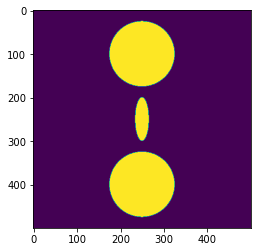

In [20]:
plt.imshow(img)
print(np.sum(img*rsqr*x))

In [4]:
# Quadruple moment:

q2=np.zeros([2,2])
xy=[x,y]
for i in [0,1]:
    for j in [0,1]:
        if i==j:
            dij=1
        else:
            dij=0
        q2[i,j]=1./2.*np.sum(img*(2*xy[i]*xy[j] - rsqr*dij))
print("Quadrupol moment:\n\n",q2/np.sum(img))

Quadrupol moment:

 [[ 1.79467896 -1.26436873]
 [-1.26436873 -1.79467896]]


In [5]:
# Octupole moment:

q3=np.zeros([2,2,2])
xy=[x,y]
for i in [0,1]:
    for j in [0,1]:
        if i==j:
            dij=1
        else:
            dij=0
        for k in [0,1]:
            if i==k:
                dik=1
            else:
                dik=0
            if j==k:
                djk=1
            else:
                djk=0
            q3[i,j,k]=1./2.*np.sum(img*(4*xy[i]*xy[j]*xy[k])) - np.sum(img*(rsqr*(xy[i]*djk + xy[j]*dik + xy[k]*dij)))
print("Octupolpol moment:\n\n",q3/np.sum(img))

Octupolpol moment:

 [[[ 3.13365604e-15 -1.16556981e-16]
  [-7.18731191e-17 -6.42644305e-16]]

 [[-7.18731191e-17 -6.42644305e-16]
  [-6.42644305e-16  1.76273234e-15]]]


In [6]:
# Hexadecapole moment:

q4=np.zeros([2,2,2,2])
xy=[x,y]
for i in [0,1]:
    for j in [0,1]:
        if i==j:
            dij=1
        else:
            dij=0
        for k in [0,1]:
            if i==k:
                dik=1
            else:
                dik=0
            if j==k:
                djk=1
            else:
                djk=0
            for l in [0,1]:
                if i==l:
                    dil=1
                else:
                    dil=0
                if j==l:
                    djl=1
                else:
                    djl=0
                if k==l:
                    dkl=1
                else:
                    dkl=0
                q4[i,j,k,l]=1./8.*np.sum(img*(24*xy[i]*xy[j]*xy[k]*xy[l] - 
                                       4*rsqr*(xy[k]*xy[l]*dij + xy[j]*xy[l]*dik + xy[j]*xy[k]*dil + xy[i]*xy[l]*djk + xy[i]*xy[k]*djl + xy[i]*xy[j]*dkl)) +
                                       img*(dij*dkl + dik*djl + dil*djk)*rsqr**2)

In [7]:
print("Hexadecapol moment:\n\n",q4/np.sum(img))

Hexadecapol moment:

 [[[[ 8.76924311  1.91972498]
   [ 1.91972498 -8.76924311]]

  [[ 1.91972498 -8.76924311]
   [-8.76924311 -1.91972498]]]


 [[[ 1.91972498 -8.76924311]
   [-8.76924311 -1.91972498]]

  [[-8.76924311 -1.91972498]
   [-1.91972498  8.76924311]]]]


In [8]:
q4b=q4

In [9]:
print("Hexadecapol moment:\n\n",q4/np.sum(img))

Hexadecapol moment:

 [[[[ 8.76924311  1.91972498]
   [ 1.91972498 -8.76924311]]

  [[ 1.91972498 -8.76924311]
   [-8.76924311 -1.91972498]]]


 [[[ 1.91972498 -8.76924311]
   [-8.76924311 -1.91972498]]

  [[-8.76924311 -1.91972498]
   [-1.91972498  8.76924311]]]]


In [10]:
print(q4b/np.sum(img))

[[[[ 8.76924311  1.91972498]
   [ 1.91972498 -8.76924311]]

  [[ 1.91972498 -8.76924311]
   [-8.76924311 -1.91972498]]]


 [[[ 1.91972498 -8.76924311]
   [-8.76924311 -1.91972498]]

  [[-8.76924311 -1.91972498]
   [-1.91972498  8.76924311]]]]
